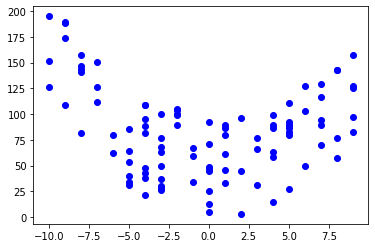

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.random.randint(-10, 10, 100)
y1 = x1 ** 2 - x1 + np.random.randint(1, 100, 100)
plt.scatter(x1, y1, c='b')

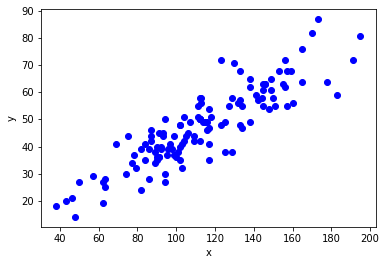

In [6]:
import pandas as pd
df = pd.read_csv('..//z_data//3_film.csv')
x = df['filmsize']
y = df['filmnum']
plt.scatter(x, y, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: 5, dtype: float64
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


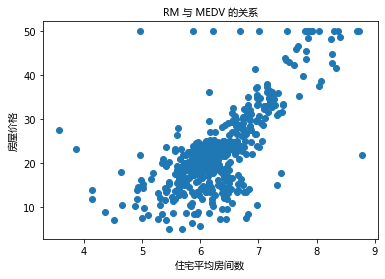

(379, 1) (127, 1) (379, 1) (127, 1)
求解系数为： [-32.39387294]
求解系数为： [[8.7044429]]


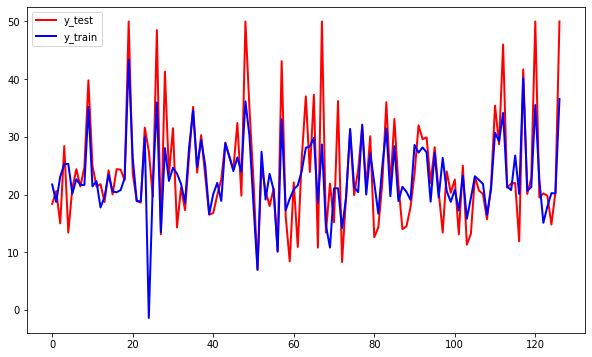

r2:  0.5742611267193293
r2_score:  0.5742611267193293
MAE:  4.105464763542914
MSE:  37.940212899105916
RMSE:  6.159562719796424


ValueError: not enough values to unpack (expected 5, got 4)

In [9]:
# 3.3.1  一个简单案例：波士顿房屋价格的拟合与预测
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.feature_names)
bos = pd.DataFrame(boston.data)
print(bos[5].head())
bos_target = pd.DataFrame(boston.target)
print(bos_target.head())


# 绘制房屋价格（MEDV）、每个房屋的房间数量（RM）的散点图
import matplotlib.font_manager as fm

x = bos.iloc[:, 5:6]
y = bos_target
# 定义自定义字体，文件名是系统中文字体
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')
plt.scatter(x, y)
plt.xlabel(u'住宅平均房间数', fontproperties=myfont)
plt.ylabel(u'房屋价格', fontproperties=myfont)
plt.title(u'RM 与 MEDV 的关系', fontproperties=myfont)
plt.show()


from sklearn.model_selection import train_test_split

# 把x、y转化为数组形式，以便于计算
x = np.array(x.values)
y = np.array(y.values)
# 以25%的数据构建测试样本，剩余作为训练样本
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print('求解系数为：', lr.intercept_)
print('求解系数为：', lr.coef_)
y_hat = lr.predict(x_test)  # 对测试集的预测
y_hat[0:9]  # 打印前10个预测值


# y_test 与 y_hat 的可视化
plt.figure(figsize=(10, 6))  # 设置图片尺寸
t = np.arange(len(x_test))  # 创建 t 变量
# 绘制 y_test 曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test')
# 绘制 y_hat 曲线
plt.plot(t, y_hat, 'b', linewidth=2, label='y_train')
plt.legend()
plt.show()


# 采用评估指标拟合优度 R²、MAE、MSE、RMSE 对预测效果进行评价
from sklearn import metrics  # 导入 metris 评价模块
from sklearn.metrics import r2_score  # 导入计算 r2_score 的模块
# 拟合优度 R² 的输出方法一
print('r2: ', lr.score(x_test, y_test))
# 拟合优度 R² 的输出方法二
print('r2_score: ', r2_score(y_test, y_hat))
# 用 Scikit-learn 计算 MAE
print('MAE: ', metrics.mean_absolute_error(y_test, y_hat))
# 用 Scikit-learn 计算 MSE
print('MSE: ', metrics.mean_squared_error(y_test, y_hat))
# 用 Scikit-learn 计算 RMSE
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))


# 采用最小二乘法求解
import math

# 构建最小二乘回归函数
def linefit(x, y):
    N = len(x)  # 计算样本值 N
    sx, sy, sxx, syy, sxy = 0, 0, 0, 0  # 设置初始值
    for i in range(0, N):
        sx += x[i]  # 计算 xi 的总和
        sy += y[i]  # 计算 yi 的总和
        sxx += x[i] * x[i]  # 计算 xi 平方的总和
        syy += y[i] * y[i]  # 计算 yi 平方的总和
        sxy += x[i] * y[i]  # 计算 xi * yi 的总和
    a = (sy * sx / N - sxy) / (sx *  sx / N - sxx)  # 求解系数 a
    b = (sy - a * sx) / N  # 求解系数 b
    return a, b


a, b = linefit(x_train, y_train)  # 求解系数 a、b
y_hat1 = a * x_test + b
# 用 Scikit-learn 计算 MAE
print('MAE: ', metrics.mean_absolute_error(y_test, y_hat1))
# 用 Scikit-learn 计算 MSE
print('MSE: ', metrics.mean_squared_error(y_test, y_hat1))
# 用 Scikit-learn 计算 RMSE
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))